#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

## **Modelagem Preditiva com Árvores de Decisão: Do Tratamento de Dados à Otimização de Modelos**

### **Introdução**

O avanço da ciência de dados tem permitido que organizações tomem decisões mais informadas e assertivas com base em grandes volumes de dados. Um dos principais desafios desse processo é transformar dados brutos em informações estruturadas e utilizáveis para modelagem preditiva. 

Neste projeto, exploramos a utilização de **Árvores de Decisão**, um dos algoritmos mais interpretáveis do aprendizado de máquina, para resolver problemas de classificação e regressão. Desde a **preparação e transformação dos dados**, passando pela **divisão entre treino e teste**, até a **construção e otimização dos modelos**, cobrimos um pipeline completo de modelagem.

Nosso estudo abrange duas aplicações principais:
1. **Predição de Inadimplência** – Construção de um modelo preditivo para identificar padrões que indicam um possível cliente inadimplente.
2. **Previsão de Preços Imobiliários** – Desenvolvimento de uma árvore de regressão para prever o valor mediano de imóveis com base em variáveis socioeconômicas e ambientais.

### **Objetivos do Projeto**
✅ **Explorar e limpar os dados**, garantindo qualidade e consistência.  
✅ **Criar metadados estruturados** para melhor documentação das variáveis.  
✅ **Transformar variáveis categóricas em numéricas** para compatibilidade com modelos de aprendizado de máquina.  
✅ **Construir e analisar Árvores de Decisão** para previsão de inadimplência e preços imobiliários.  
✅ **Otimizar os modelos com técnicas de poda (CCP-alpha pruning)**, garantindo melhor desempenho e menor risco de overfitting.  
✅ **Visualizar e interpretar as árvores**, destacando as variáveis mais importantes na tomada de decisão.  

Ao final deste projeto, buscamos não apenas obter bons modelos preditivos, mas também compreender **como cada variável influencia a tomada de decisão do modelo**, proporcionando insights valiosos para negócios e políticas públicas.

## **Análise Exploratória da Base de Dados**

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree, datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

In [4]:
# Carregando a base de dados
df = pd.read_csv('demo01.csv')

# Visualizando informações gerais do DataFrame
df.info()

# Removendo duplicatas
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Verificando o shape da base
print(f"Shape da base após remoção de duplicatas: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [7]:
df.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False


In [9]:
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [11]:
# Analisando a distribuição da variável-alvo 'mau'
print(f"Total de casos 'mau' = 1: {df['mau'].sum()}")
print(f"Distribuição da variável resposta:\n{df['mau'].value_counts()}")

Total de casos 'mau' = 1: 298
Distribuição da variável resposta:
mau
False    6472
True      298
Name: count, dtype: int64


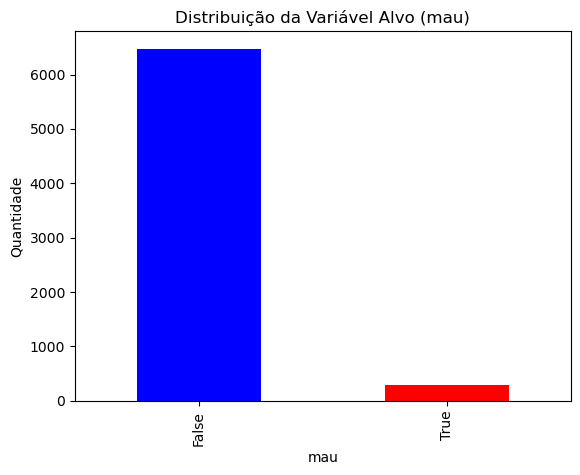

In [15]:
# Plotando a distribuição da variável 'mau'
df_mau = df.groupby('mau')['mau'].count()
df_mau.plot(kind='bar', title='Distribuição da Variável Alvo (mau)', ylabel='Quantidade', xlabel='mau', color=['blue', 'red'])
plt.show()

## **Construção do Metadados**

In [18]:
# Criando uma lista com o nome das colunas
colunas = df.columns.to_list()

# Criando um dataframe com os tipos de dados
df_cat = pd.DataFrame(list(map(lambda x: df[x].dtype, colunas)), index=colunas, columns=['type'])
df_cat

,type
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [20]:
# Criando um dataframe com a contagem de categorias únicas por variável
df_val = pd.DataFrame(list(map(lambda x: df[x].nunique(), colunas)), index=colunas, columns=['cat_num'])
df_val

,cat_num
sexo,2
posse_de_veiculo,2
posse_de_imovel,2
qtd_filhos,8
tipo_renda,5
educacao,5
estado_civil,5
tipo_residencia,6
idade,5298
tempo_emprego,3005


In [22]:
# Concatenando os metadados
df_meta = pd.concat([df_val, df_cat], axis=1)
df_meta

,cat_num,type
sexo,2,object
posse_de_veiculo,2,object
posse_de_imovel,2,object
qtd_filhos,8,int64
tipo_renda,5,object
educacao,5,object
estado_civil,5,object
tipo_residencia,6,object
idade,5298,float64
tempo_emprego,3005,float64


## **Transformação e Engenharia de Features**

In [25]:
# Convertendo variáveis categóricas binárias para numéricas
df['sexo'] = df['sexo'].map({'F':0, 'M':1})
df['posse_de_veiculo'] = df['posse_de_veiculo'].map({'N':0, 'Y':1})
df['posse_de_imovel'] = df['posse_de_imovel'].map({'N':0, 'Y':1})
df['mau'] = df['mau'].astype(int)

In [29]:
df_dum = pd.get_dummies(df, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
df_dum.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,True,True,False,False,False,True,False,False,False,False


In [31]:
df.dtypes

sexo                       int64
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int32
dtype: object

## **Análise Comparativa de Variáveis Preditivas**

In [34]:
df_cruzado_veiculo = pd.crosstab(df['posse_de_veiculo'], df['mau'])
print("Cruzamento entre posse de veículo e mau:")
print(df_cruzado_veiculo)

Cruzamento entre posse de veículo e mau:
mau                  0    1
posse_de_veiculo           
0                 4021  190
1                 2451  108


In [36]:
df_cruzado_email = pd.crosstab(df['possui_email'], df['mau'])
print("Cruzamento entre possui e-mail e mau:")
print(df_cruzado_email)

Cruzamento entre possui e-mail e mau:
mau              0    1
possui_email           
0             5927  278
1              545   20


📌 **Resultados:**
- A posse de veículo parece ser um fator mais relevante para prever `mau`.
- Já o possuir e-mail tem um impacto menor na previsão de inadimplência.

---

## **Exportação do Arquivo**

In [40]:
# Salvando a base final para análises futuras
df_dum.to_csv('arquivo.csv', index=False)
print("Arquivo 'arquivo.csv' salvo com sucesso!")

Arquivo 'arquivo.csv' salvo com sucesso!


Vimos **todo o processo de limpeza e preparação de dados para modelagem preditiva**, garantindo que os dados estejam prontos para serem utilizados em **modelos de machine learning**. Principais aprendizados:

✅ **Exploração e limpeza dos dados** para garantir qualidade e consistência.  
✅ **Criação de um metadados estruturado** para melhor documentação das variáveis.  
✅ **Transformação de variáveis categóricas** para formato adequado ao aprendizado de máquina.  
✅ **Comparação entre variáveis preditoras** para análise de influência na variável-alvo.  
✅ **Exportação do dataset final** para uso posterior em modelos de classificação.


### Agora vamos utilizar a base de dados que foi exportada

In [52]:
df = pd.read_csv('arquivo.csv', sep=',')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,1,1,1,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
3,0,1,0,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
4,0,0,1,0,27.482192,4.024658,1,0,1,0,...,True,True,False,False,False,True,False,False,False,False


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

## **Separação entre Treino e Teste**

In [57]:
y = df_dum['mau']
X = df_dum.drop('mau', axis=1)

In [59]:
# Separando 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## **Modelagem com Árvore de Decisão**

In [62]:
# Criando e treinando o modelo
clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [68]:
# Visualizando a árvore
plt.figure(figsize=(20, 20))
tree.plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

<Figure size 2000x2000 with 0 Axes>

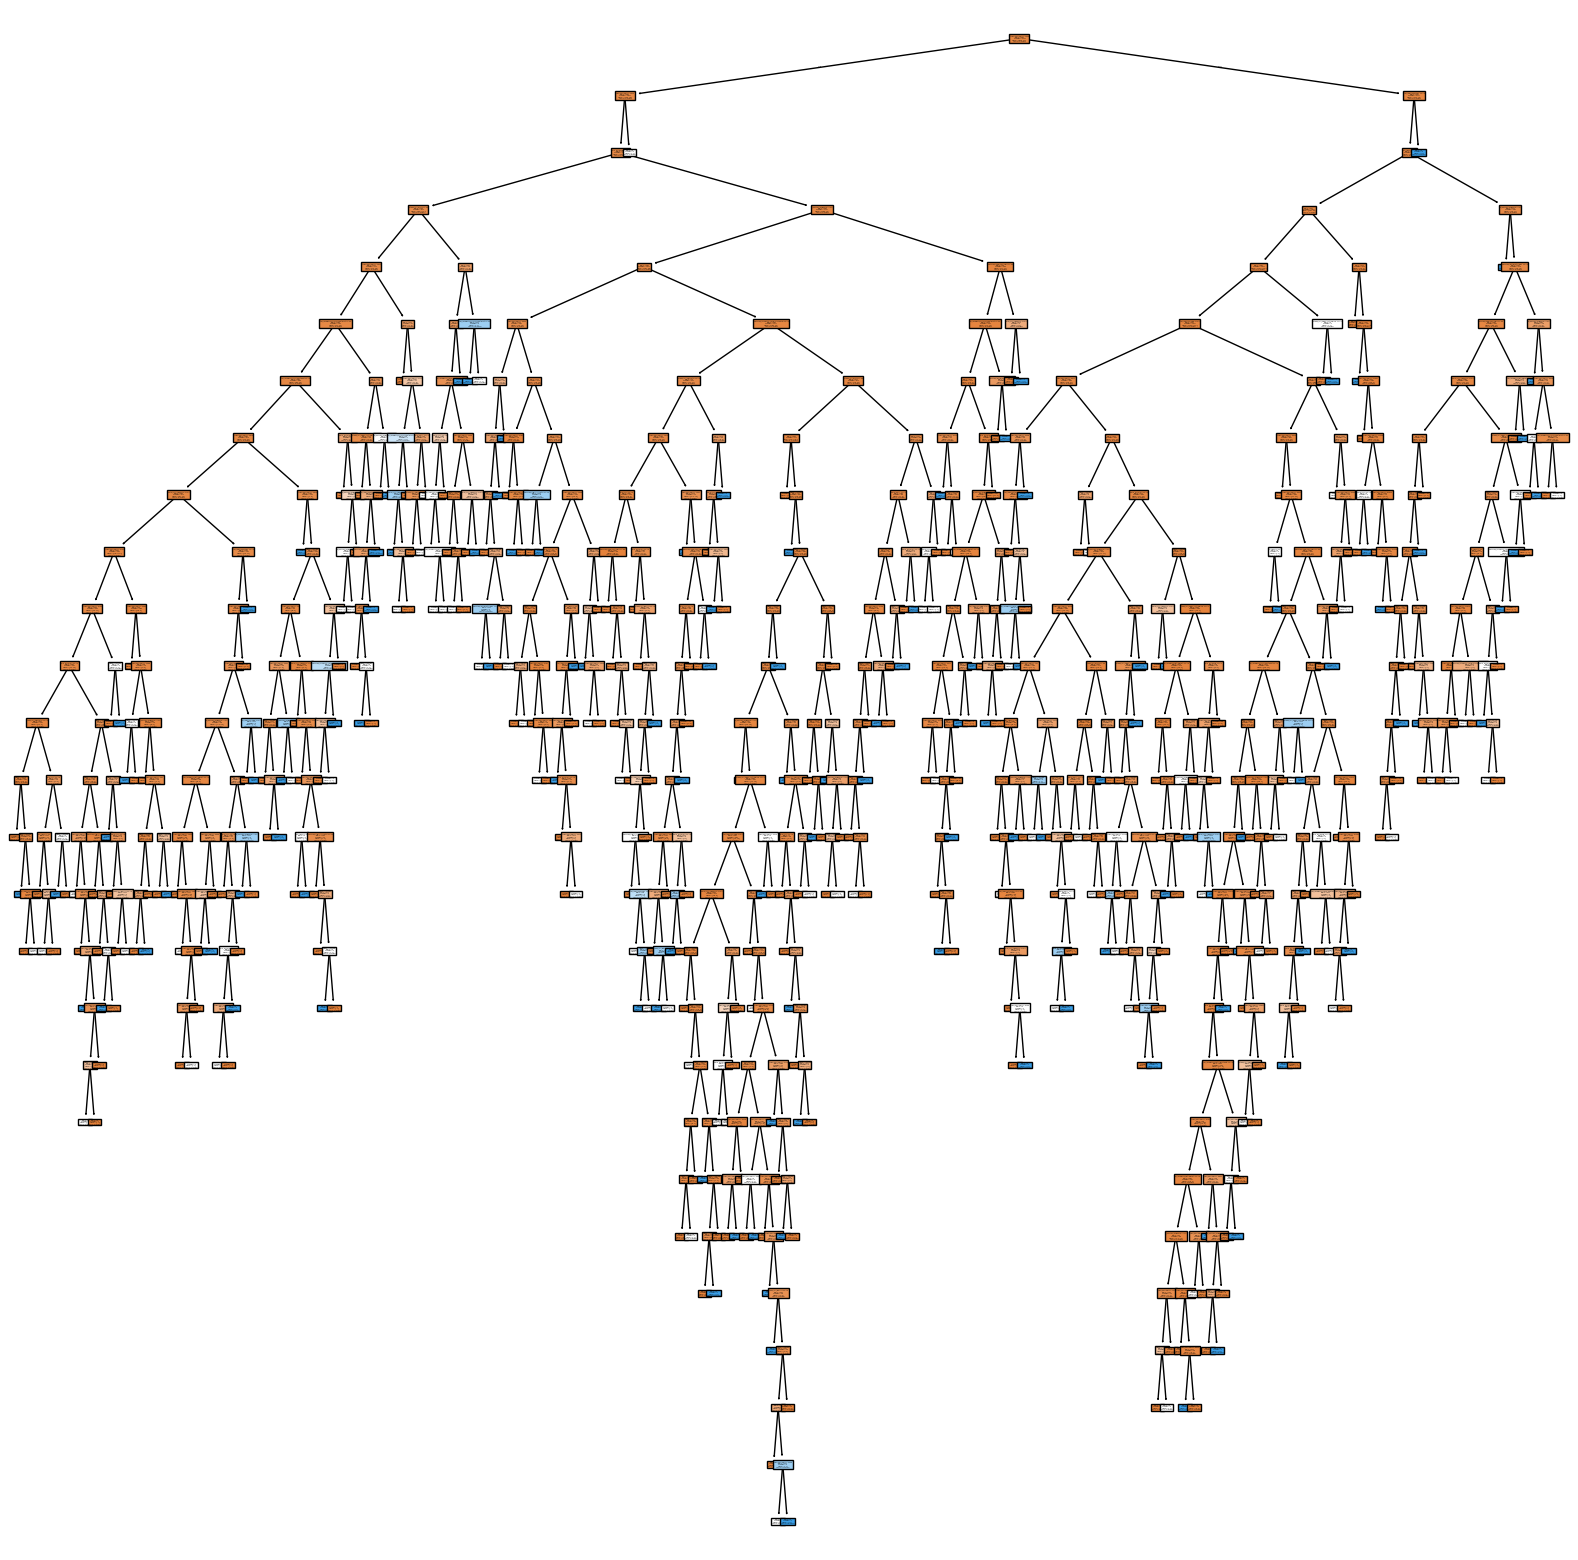

In [76]:
plt.show()

In [78]:
# Predições
y_pred = clf.predict(X_test)

In [80]:
# Exibir a acurácia
print(f"Acurácia na base de teste: {accuracy_score(y_test, y_pred):.4f}")

Acurácia na base de teste: 0.9183


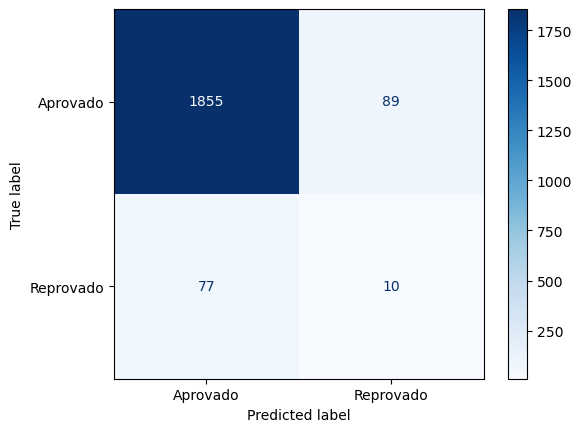

In [82]:
# Criar e exibir a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovado', 'Reprovado'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Aqui vimos até o momento **todo o pipeline de preparação de dados e modelagem preditiva**, com destaque para os seguintes aprendizados:

✅ **Limpeza e estruturação dos dados** para garantir qualidade na modelagem.  
✅ **Conversão de variáveis categóricas** para formato numérico adequado.  
✅ **Geração de metadados** para documentar a estrutura da base.  
✅ **Separação da base entre treino e teste** para avaliação justa do modelo.  
✅ **Construção e análise de uma árvore de decisão** para previsão de inadimplência.  

### Modelagem de Árvores de Regressão com Dados Imobiliários de Boston

As **árvores de regressão** são um dos métodos mais intuitivos e interpretáveis para prever valores contínuos. Neste projeto, utilizamos **dados imobiliários da cidade de Boston** para construir modelos preditivos do **valor mediano das casas ocupadas pelo proprietário (MEDV)** com base em diferentes variáveis explicativas.

Os principais objetivos incluem:
- **Preparação e limpeza dos dados** para garantir compatibilidade com o `scikit-learn`.
- **Análise exploratória** com foco na **correlação entre variáveis** e impacto na variável alvo.
- **Treinamento de modelos de árvore de regressão** com diferentes profundidades.
- **Avaliação de desempenho** utilizando **erro quadrático médio (MSE)** e **coeficiente de determinação (R²)**.
- **Visualização gráfica da árvore de decisão** para interpretação da importância das variáveis.

In [104]:
# Definição das colunas do dataset
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Carregando a base de dados
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)

# Separação de linhas pares e ímpares para limpeza
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)

# Mesclando os dados processados
boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yanks\AppData\Local\Temp\ipykernel_17972\909557241.py:5: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [106]:
# Salvando a base limpa
boston.to_csv(path_or_buf='boston_clean_data.csv', index=False)

# Separação de variáveis
X = boston.drop(columns='MEDV')
y = boston['MEDV']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

boston

Quantidade de linhas e colunas de X: (506, 13)
Quantidade de linhas de y: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## **Análise Exploratória e Correlação**

### Verificação dos tipos de dados e possíveis valores ausentes

In [111]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [113]:
boston.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


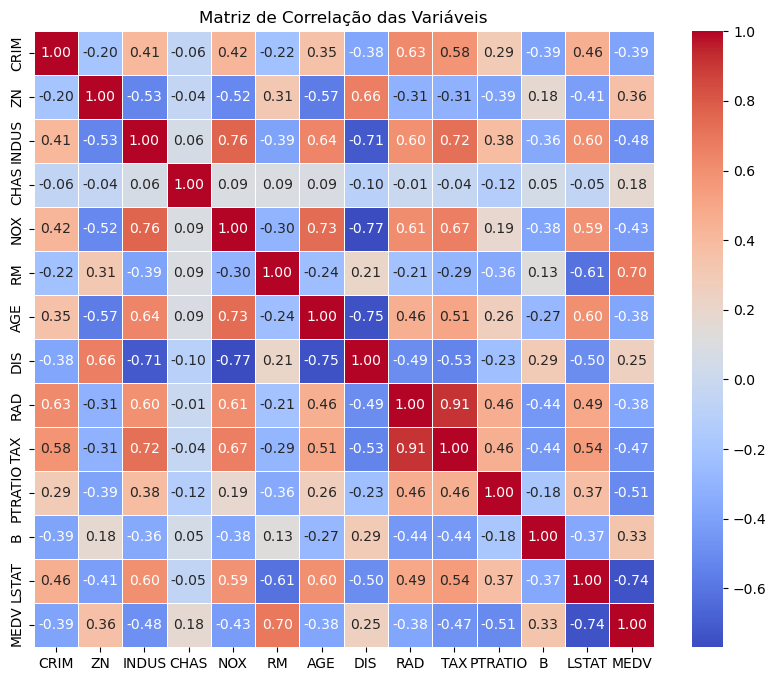

In [115]:
# Matriz de correlação
correlation_matrix = boston.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

📌 **Observação:** A variável `RM` (número médio de quartos por habitação) apresenta um interessante potencial preditivo, tendo um valor considerável de correlação com a variável resposta em relação a todas as outras. Outra variável com potencial preditivo interessante é a `LSTAT` (% de status inferior da população), com um valor ainda maior de correlação, porém negativo.

## **Separação da Base em Treinamento e Teste**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)
y_train: (379,)
y_test: (127,)


## Treinamento de Árvores de Regressão**

### Treinamento de duas árvores com diferentes profundidades

In [124]:
# Árvore com profundidade máxima = 8
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)

# Árvore com profundidade máxima = 2
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2402)

## **Avaliação do Modelo - MSE e R²**

### Cálculo do erro quadrático médio (MSE) para cada árvore

In [127]:
mse1_train = mean_squared_error(y_train, tree_1.predict(X_train))
mse1_test = mean_squared_error(y_test, tree_1.predict(X_test))

mse2_train = mean_squared_error(y_train, tree_2.predict(X_train))
mse2_test = mean_squared_error(y_test, tree_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'
print(template.format(tree_1.get_depth(), 'treino', mse1_train))
print(template.format(tree_1.get_depth(), 'teste', mse1_test), '\n')
print(template.format(tree_2.get_depth(), 'treino', mse2_train))
print(template.format(tree_2.get_depth(), 'teste', mse2_test))

O erro quadrático médio (MSE) da árvore com profundidade = 8 para a base de treino é: 1.84
O erro quadrático médio (MSE) da árvore com profundidade = 8 para a base de teste é: 12.65 

O erro quadrático médio (MSE) da árvore com profundidade = 2 para a base de treino é: 27.11
O erro quadrático médio (MSE) da árvore com profundidade = 2 para a base de teste é: 21.70


In [129]:
# Cálculo do coeficiente de determinação (R²)
r2_1_train = tree_1.score(X_train, y_train)
r2_2_train = tree_2.score(X_train, y_train)
r2_1_test = tree_1.score(X_test, y_test)
r2_2_test = tree_2.score(X_test, y_test)

template = 'O coeficiente de determinação (R²) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'
print(template.format(tree_1.get_depth(), 'treino', r2_1_train))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test), '\n')
print(template.format(tree_2.get_depth(), 'treino', r2_2_train))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test))

O coeficiente de determinação (R²) da árvore com profundidade = 8 para a base de treino é: 0.98
O coeficiente de determinação (R²) da árvore com profundidade = 8 para a base de teste é: 0.85 

O coeficiente de determinação (R²) da árvore com profundidade = 2 para a base de treino é: 0.68
O coeficiente de determinação (R²) da árvore com profundidade = 2 para a base de teste é: 0.74


📌 **Conclusão:** A árvore com profundidade **8** apresentou melhor desempenho no conjunto de teste, sugerindo um melhor ajuste ao problema.

## **Visualização da Árvore de Decisão**

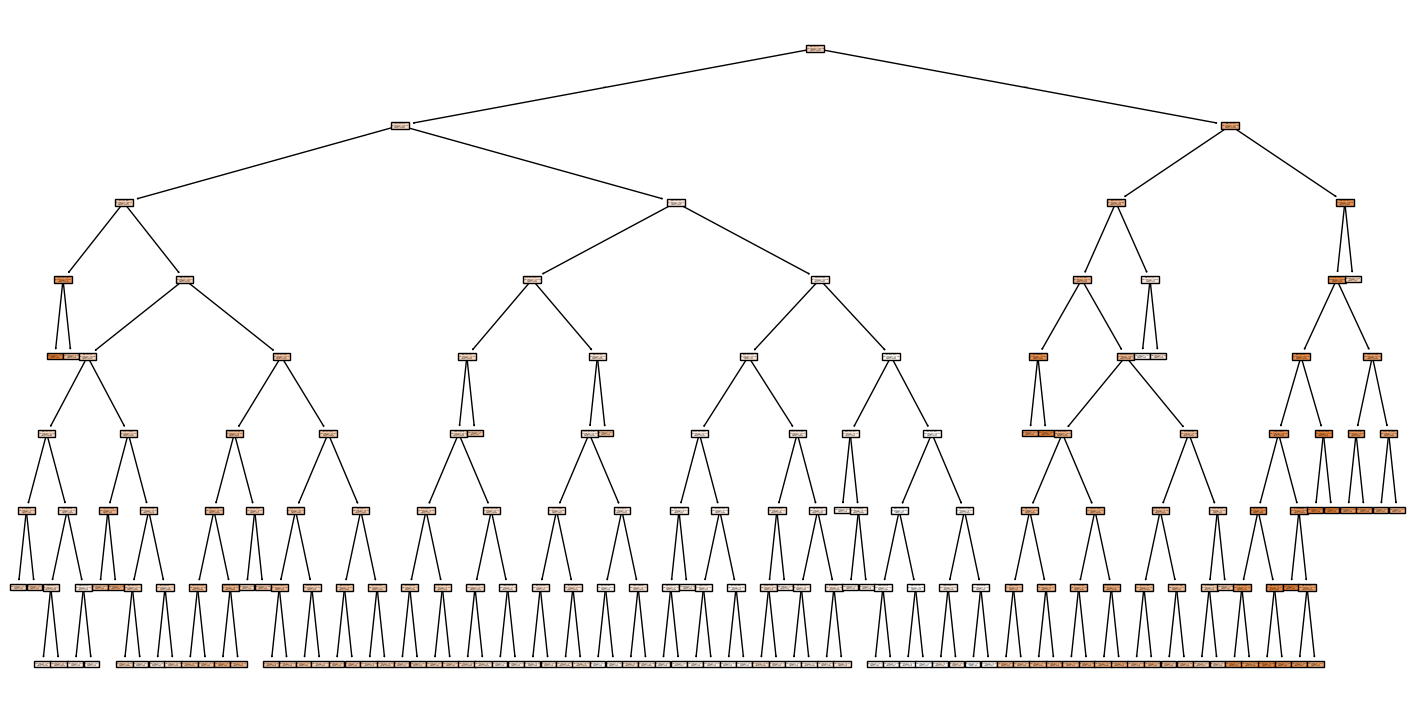

In [133]:
plt.figure(figsize=(18,9))
tree.plot_tree(tree_1, feature_names=X.columns, filled=True)
plt.show()

### Visualização impressa da árvore

In [136]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_5 <= 4.41
|   |   |   |   |   |   |--- feature_11 <= 243.06
|   |   |   |   |   |   |   |--- value: [23.10]
|   |   |   |   |   |   |--- feature_11 >  243.06
|   |   |   |   |   |   |   |--- value: [27.50]
|   |   |   |   |   |--- feature_5 >  4.41
|   |   |   |   |   |   |--- feature_6 <= 98.65
|   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |--- value: [20.31]
|   |   |   |   |   |   |--- feature_6 >  98.65
|   |   |   |   |   |   |   |--- feature_5 <= 5.91
|   |   |   |   |   |   |   |  

📌 **Variável mais importante:** A **RM (número médio de quartos por habitação)** foi a variável com maior impacto na previsão do valor das casas.

---

### **Vimos até aqui**
Este estudo demonstrou o poder das **árvores de regressão** para prever preços de imóveis, abordando:

✅ **Exploração e limpeza de dados**.

✅ **Correlação e análise de variáveis explicativas**.

✅ **Divisão entre treino e teste** para avaliar a generalização do modelo.

✅ **Treinamento e comparação de diferentes profundidades de árvores**.

✅ **Interpretação da importância das variáveis e desempenho do modelo**.

### Otimização de Árvores de Regressão para Predição de Preços Imobiliários

A escolha do modelo certo é essencial para alcançar um bom desempenho preditivo. Neste projeto, buscamos **a melhor árvore de regressão** para prever o **valor mediano das casas ocupadas pelo proprietário** usando a base de dados imobiliários de Boston. 

Utilizaremos técnicas avançadas para **ajustar hiperparâmetros**, reduzindo o **overfitting** e melhorando a **generalização do modelo**. Faremos isso através do **CCP-alpha pruning**, que ajuda a podar a árvore e melhorar sua capacidade preditiva.

📌 **Objetivos do momento:**
✅ Preparação da base de dados e separação em treino e teste.  
✅ Construção de uma árvore inicial de regressão.  
✅ Cálculo do caminho de poda via **CCP-alpha pruning**.  
✅ Avaliação do impacto da poda no erro quadrático médio (MSE).  
✅ Identificação do melhor **CCP-alpha** para obter um modelo otimizado.  
✅ Visualização da melhor árvore encontrada.

## **Preparação dos Dados**

In [143]:
# Carregando e estruturando a base de dados de Boston
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)

# Ajustando a formatação da base
even_lines = boston.loc[boston.index % 2 == 0].reset_index(drop=True)
odd_lines = boston.loc[boston.index % 2 == 1].drop([3, 4, 5, 6, 7, 8, 9, 10], axis=1).reset_index(drop=True)
boston = even_lines.merge(odd_lines, how="left", left_index=True, right_index=True)
boston.columns = columns
boston

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yanks\AppData\Local\Temp\ipykernel_17972\3383221639.py:3: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv("boston.txt", sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Salvando os dados limpos
boston.to_csv('boston_clean_data.csv', index=False)

# Definição das variáveis explicativas e resposta
X = boston.drop(columns='MEDV')
y = boston['MEDV']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

boston

In [ ]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

## **Construção da Árvore Inicial de Regressão**

In [146]:
# Criando uma árvore de regressão inicial
dt_reg = DecisionTreeRegressor(max_depth=8, random_state=2402)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2402)

In [148]:
# Avaliação do modelo inicial
print('Erro Quadrático Médio (MSE):', round(mean_squared_error(y_true=y_train, y_pred=dt_reg.predict(X_train)), 2))
print('Coeficiente de determinação (R²):', round(dt_reg.score(X=X_train, y=y_train), 2))

Erro Quadrático Médio (MSE): 1.84
Coeficiente de determinação (R²): 0.98


In [151]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=dt_reg.predict(X_train), 
                             columns=['Valor predito do imóvel na base de treinamento']
                            )
               ], axis=1)

,MEDV,Valor predito do imóvel na base de treinamento
0,17.1,16.133333
1,13.4,13.000000
2,50.0,50.000000
3,8.5,6.910000
4,16.6,16.300000
...,...,...
374,32.0,30.080000
375,17.1,17.833333
376,20.4,20.312281
377,19.4,19.033333


## **Caminho de Poda via CCP-alpha Pruning**

In [153]:
# Obtendo o caminho de poda
path = dt_reg.cost_complexity_pruning_path(X=X_train, y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

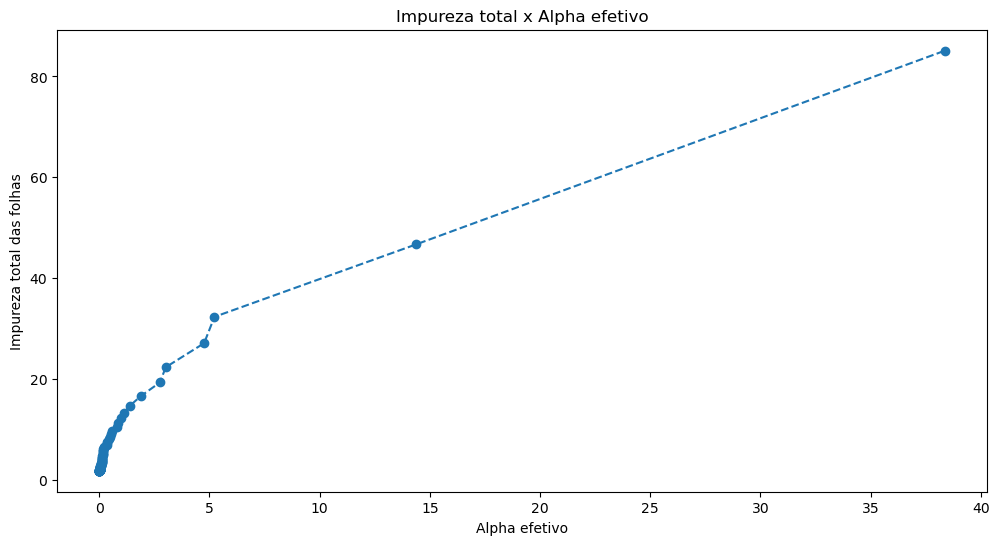

In [155]:
# Visualizando a impureza total em relação ao alpha
plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='--')
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')
plt.title('Impureza total x Alpha efetivo')
plt.show()

## **Treinamento de Múltiplas Árvores para Encontrar a Melhor Poda**

In [158]:
# Treinando árvores para cada valor de CCP-alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=2402)
    clf.fit(X_train, y_train)
    clfs.append(clf)

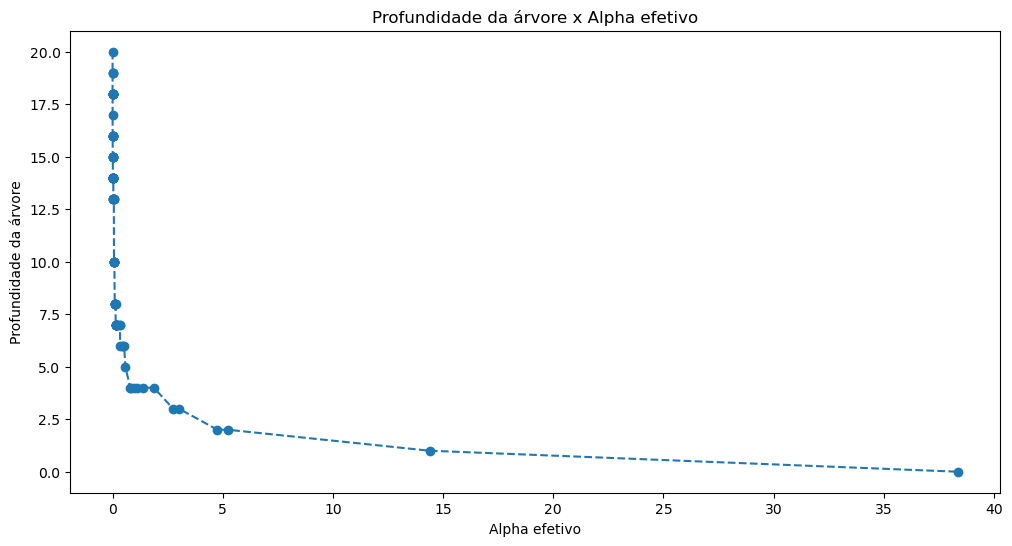

In [160]:
# Medindo a profundidade de cada árvore
tree_depths = [clf.tree_.max_depth for clf in clfs]

# Visualizando a profundidade da árvore em relação ao alpha
plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, tree_depths, marker='o', linestyle='--')
plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade da árvore')
plt.title('Profundidade da árvore x Alpha efetivo')
plt.show()

## **Escolha do Melhor Alpha pelo Erro Quadrático Médio (MSE)**

In [163]:
# Calculando MSE para cada árvore
train_scores = [mean_squared_error(y_true=y_train, y_pred=clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_true=y_test, y_pred=clf.predict(X_test)) for clf in clfs]

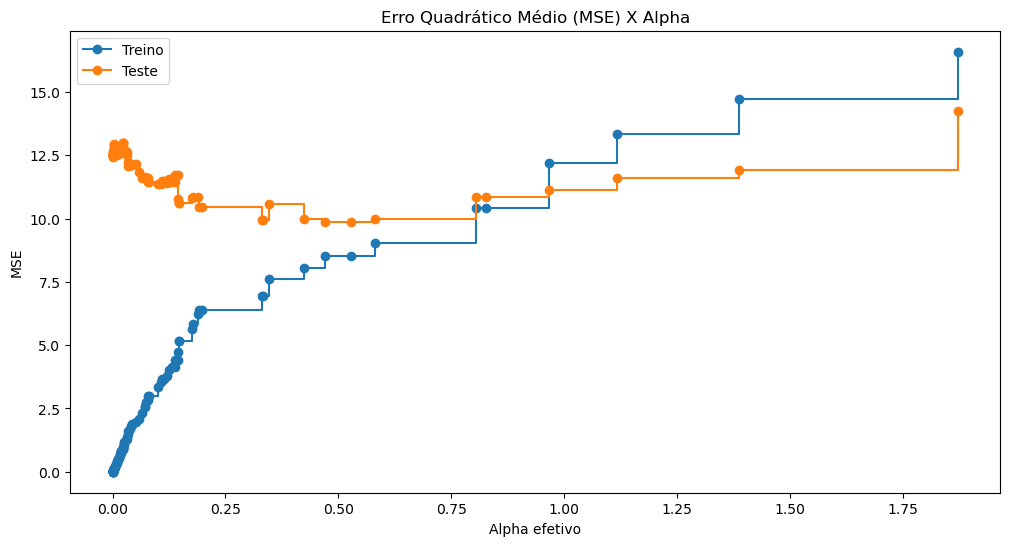

In [165]:
# Visualizando o MSE em função do alpha
plt.figure(figsize=(12,6))
plt.plot(ccp_alphas[:-6], train_scores[:-6], marker='o', label='Treino', drawstyle='steps-post')
plt.plot(ccp_alphas[:-6], test_scores[:-6], marker='o', label='Teste', drawstyle='steps-post')
plt.xlabel('Alpha efetivo')
plt.ylabel('MSE')
plt.title('Erro Quadrático Médio (MSE) X Alpha')
plt.legend()
plt.show()

## **Seleção da Melhor Árvore**

In [168]:
# Selecionando o melhor alpha
ccp_alpha_min = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
ccp_alpha_min = ccp_alpha_min.sort_values(by=['test_scores', 'train_scores']).iloc[0, 0]

# Treinando a árvore final
final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=2402)
final_tree.fit(X_train, y_train)

# Avaliação do modelo final
print(f'Profundidade da melhor árvore: {final_tree.tree_.max_depth}')
print(f'R² na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade da melhor árvore: 6
R² na base de testes: 0.88
MSE na base de testes: 9.88


## **Visualização da Melhor Árvore**

In [171]:
plt.figure(figsize=(12,6))
tree.plot_tree(decision_tree=final_tree, feature_names=X.columns, filled=True);

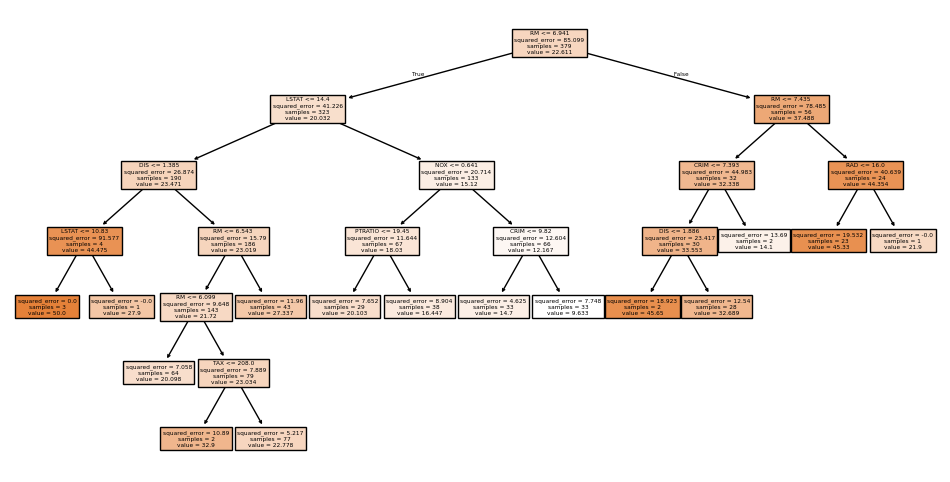

In [173]:
plt.show()

Vimos agora **como otimizar árvores de regressão** para prever preços imobiliários. Com o **CCP-alpha pruning**, conseguimos reduzir a complexidade do modelo, mantendo um bom desempenho preditivo.

✅ **Ajustamos o modelo com diferentes níveis de poda** e identificamos a melhor profundidade.  
✅ **Utilizamos métricas de erro quadrático médio (MSE) e coeficiente de determinação (R²)** para avaliar o desempenho.  
✅ **Demonstramos visualmente a melhor árvore encontrada**, garantindo interpretabilidade.  

🚀 **Essa abordagem melhora a generalização do modelo e evita overfitting, sendo fundamental para aplicações preditivas realistas!**


## **Conclusão**

Este projeto demonstrou **todo o ciclo de vida de um modelo preditivo baseado em Árvores de Decisão**, desde a **preparação dos dados** até a **implementação e otimização dos modelos**. Os principais aprendizados incluem:

### **1. Preparação e Limpeza dos Dados**
- Dados brutos frequentemente contêm **valores ausentes, duplicatas e inconsistências** que devem ser tratados antes da modelagem.
- A **engenharia de features**, como a conversão de variáveis categóricas em dummies, é fundamental para melhorar a performance dos modelos.
- A criação de **metadados estruturados** auxilia na organização e interpretação da base de dados.

### **2. Construção de Modelos Preditivos**
- As **Árvores de Decisão são altamente interpretáveis**, permitindo visualizar como as decisões são tomadas.
- No problema de **inadimplência**, a posse de veículo demonstrou ser uma variável mais preditiva do que a posse de e-mail.
- No problema de **preços imobiliários**, variáveis como **número médio de quartos por habitação (RM)** e **percentual da população de baixo status socioeconômico (LSTAT)** foram as mais relevantes.

### **3. Otimização e Generalização**
- Sem técnicas de controle, **Árvores de Decisão podem sofrer overfitting**, ajustando-se excessivamente aos dados de treino.
- O uso de **poda (CCP-alpha pruning)** permitiu encontrar um equilíbrio entre complexidade e desempenho, resultando em modelos mais generalizáveis.
- O **erro quadrático médio (MSE) e o coeficiente de determinação (R²)** foram utilizados como métricas para avaliar a performance das árvores de regressão.

### **4. Aplicação Prática e Impacto**
- Em aplicações reais, os modelos podem ser utilizados para **auxiliar na concessão de crédito**, prevenindo inadimplências com base em padrões identificados nos dados históricos.
- No mercado imobiliário, a modelagem preditiva pode **orientar precificação de imóveis** e apoiar decisões de investimento.

**Este estudo reforça a importância das Árvores de Decisão como uma ferramenta poderosa para análise preditiva, permitindo que insights valiosos sejam extraídos de grandes conjuntos de dados.** Ao unir interpretação, desempenho e aplicabilidade, conseguimos construir modelos robustos e úteis para diferentes áreas do mercado e da sociedade.